In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

warnings.simplefilter(action='ignore', category=Warning)

In [4]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,Iris-setosa
1,4.90,3.00,1.40,0.20,Iris-setosa
2,4.70,3.20,1.30,0.20,Iris-setosa
3,4.60,3.10,1.50,0.20,Iris-setosa
4,5.00,3.60,1.40,0.20,Iris-setosa


In [5]:
def check_df(dataframe, head=5):
    print("Shape")
    print(dataframe.shape)
    print("Types")
    print(dataframe.dtypes)
    print("Head")
    print(dataframe.head(head))
    print("Tail")
    print(dataframe.tail(head))
    print("NA")
    print(dataframe.isnull().sum())
    print("Quantiles")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [6]:
check_df(df)

Shape
(150, 5)
Types
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
Head
   sepal_length  sepal_width  petal_length  petal_width      species
0          5.10         3.50          1.40         0.20  Iris-setosa
1          4.90         3.00          1.40         0.20  Iris-setosa
2          4.70         3.20          1.30         0.20  Iris-setosa
3          4.60         3.10          1.50         0.20  Iris-setosa
4          5.00         3.60          1.40         0.20  Iris-setosa
Tail
     sepal_length  sepal_width  petal_length  petal_width         species
145          6.70         3.00          5.20         2.30  Iris-virginica
146          6.30         2.50          5.00         1.90  Iris-virginica
147          6.50         3.00          5.20         2.00  Iris-virginica
148          6.20         3.40          5.40         2.30  Iris-virginica
149          5.90         3.00          5.10       

In [7]:
target = "species"
num_cols = [col for col in df.columns if col not in ["species"]]

In [8]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

cat_summary(df,target)

                 species  Ratio
Iris-setosa           50  33.33
Iris-versicolor       50  33.33
Iris-virginica        50  33.33


In [9]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)


Empty DataFrame
Columns: [n_miss, ratio]
Index: []


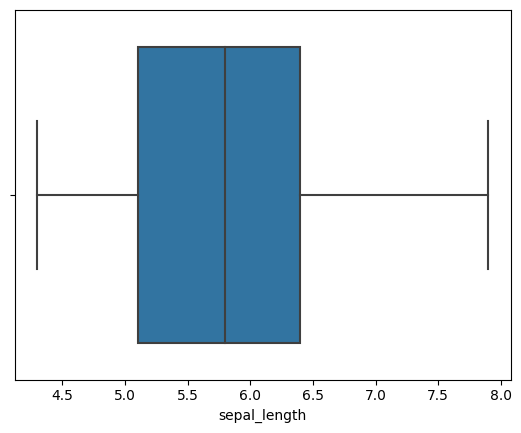

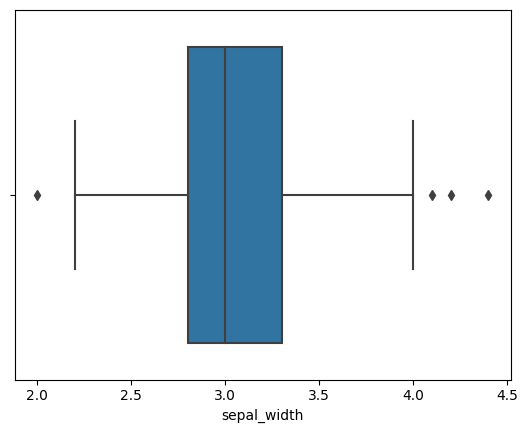

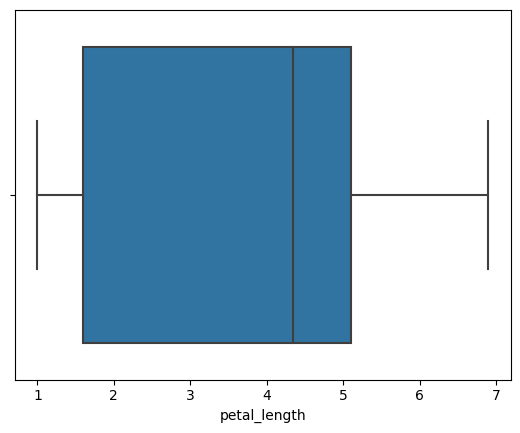

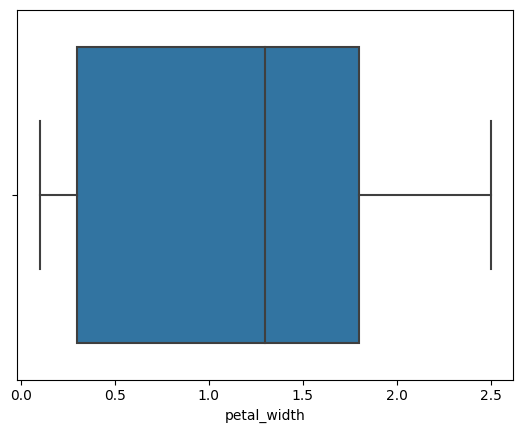

In [10]:
for col in num_cols:
    sns.boxplot(data=df, x=col)
    plt.show(block=True)

In [11]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

low_limit, up_limit = outlier_thresholds(df, "sepal_width")

In [12]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))

sepal_length False
sepal_width True
petal_length False
petal_width False


In [13]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df, "sepal_width")

for col in num_cols:
    print(col, check_outlier(df, col))

sepal_length False
sepal_width False
petal_length False
petal_width False


In [14]:
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

In [15]:
ss = StandardScaler()
df[num_cols] = ss.fit_transform(df[num_cols])

In [16]:
y = df["species"]
X = df.drop("species", axis=1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
lr = LogisticRegression()
model = lr.fit(X, y)

In [19]:
train_accuracy = model.score(X_train, y_train)
print("Train Accuracy :", train_accuracy)

Train Accuracy : 0.97


In [20]:
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy :", test_accuracy)

Test Accuracy : 0.98
